<a href="https://colab.research.google.com/github/mehrdadkazemi254/Neural_Network_From_Scratch/blob/main/Model_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data preprocessing

In [25]:
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [33]:
X_train = X_train[0:5000, :]
X_test = X_test[0:500, :]
y_train = y_train[0:5000]
y_test = y_test[0:500]
image_vector_size = 28*28
X_train = X_train.reshape(X_train.shape[0], image_vector_size)
X_test = X_test.reshape(X_test.shape[0], image_vector_size)

In [36]:
print(f" X_train shape: {X_train.shape}")
print(f" y_train shape: {y_train.shape}")
print(f" X_test shape: {X_test.shape}")
print(f" y_test shape: {y_test.shape}")

 X_train shape: (5000, 784)
 y_train shape: (5000,)
 X_test shape: (500, 784)
 y_test shape: (500,)


In [64]:
# the and y axis for plotting
cost_y = []
iteration_X = []

## The model

In [65]:
class NeuralNetwork():
    def __init__(self, X, y):
        #m : number of images
        self.m = X.shape[0]
        #n : number of features in our data (784)
        self.n = X.shape[1]
        #h1 : size of the first hidden layer
        self.h1 = 25
        #h2 : number of nodes in output (10 digits)
        self.h2 = 10
        #learning rate
        self.learning_rate = 1e-3

    def initialize_weights(self, l0, l1):
        #l0: the number of nodes it is coming from
        #l1: the number of nodes it is going to
        w = np.random.randn(l0, l1) * 0.01
        b = np.zeros((1, l1))
        return w, b

    def forward_prop(self, X, parameters): #parameters is a dictionary that stores all the necessary weights and biases
        W2 = parameters['W2']  #from the hidden layer 1 to 2
        W1 = parameters['W1']  #from the input to the hidden layer 1
        b1 = parameters['b1']
        b2 = parameters['b2']

        #forward prop
        a0 = X
        z1 = np.dot(a0, W1) + b1
        a1 = np.maximum(0, z1) #ReLU activation function
        z2 = np.dot(a1, W2) + b2

        #softmax
        scores = z2
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        cache = {'a0': X, 'probs': probs, 'a1': a1}
        return cache, probs

    def compute_cost(self, y, probs, parameters): #cross entropy loss
        W1 = parameters['W1']
        W2 = parameters['W2']

        loss = -np.log(probs[np.arange(self.m),y])
        avg_loss = np.sum(loss) / self.m

        return avg_loss

    def back_prop(self, cache, parameters, y):
        #unpack parameters
        W2 = parameters['W2']
        W1 = parameters['W1']
        b1 = parameters['b1']
        b2 = parameters['b2']

        #unpack from forward prop
        a0 = cache['a0']
        a1 = cache['a1']
        probs = cache['probs']

        #we want dW1, dW2, db1, db2
        dz2 = probs
        dz2[np.arange(self.m), y] -= 1
        dz2 /= self.m

        #backprop to dW2, db2
        dW2 = np.dot(a1.T, dz2)
        db2 = np.sum(dz2, axis=0, keepdims=True)

        dz1 = np.dot(dz2, W2.T)
        dz1 = dz1 * (a1 > 0)

        dW1 = np.dot(a0.T, dz1)
        db1 = np.sum(dz1, axis=0, keepdims=True)

        grads = {'dW1': dW1, 'dW2': dW2, 'db1': db1, 'db2': db2}

        return grads

    def update_parameters(self, parameters, grads):
        #gradient descent step
        W2 = parameters['W2']
        W1 = parameters['W1']
        b1 = parameters['b1']
        b2 = parameters['b2']

        dW1 = grads['dW1']
        dW2 = grads['dW2']
        db1 = grads['db1']
        db2 = grads['db2']

        W2 -= self.learning_rate * dW2
        W1 -= self.learning_rate * dW1
        b2 -= self.learning_rate * db2
        b1 -= self.learning_rate * db1

        parameters = {'W1': W1, 'W2': W2, 'b1': b1, 'b2': b2}
        return parameters

    def main(self, X, y, num_iter=1000):
        W1, b1 = self.initialize_weights(self.n, self.h1)
        W2, b2 = self.initialize_weights(self.h1, self.h2)

        parameters = {'W1': W1, 'W2': W2, 'b1': b1, 'b2': b2}
      
        for it in range(num_iter + 1):
            #forward prop
            cache, probs = self.forward_prop(X, parameters)

            #calculate cost
            cost = self.compute_cost(y, probs, parameters)

            if it % 100 == 0:
                print(f"At iteration {it}, we have a Loss of {cost}")

            grads = self.back_prop(cache, parameters, y)

            #update parameters
            parameters = self.update_parameters(parameters, grads)
            cost_y.append(cost)
            iteration_X.append(it)
        return parameters

## Training

In [66]:
NN = NeuralNetwork(X_train, y_train)
trained_parameters = NN.main(X_train, y_train, 1000)

At iteration 0, we have a Loss of 2.7280680809274593
At iteration 100, we have a Loss of 0.377862788392031
At iteration 200, we have a Loss of 0.2741571811694135
At iteration 300, we have a Loss of 0.22392932262773665
At iteration 400, we have a Loss of 0.1905708423263292
At iteration 500, we have a Loss of 0.16568252846679377
At iteration 600, we have a Loss of 0.14578265070370394
At iteration 700, we have a Loss of 0.1289728606703809
At iteration 800, we have a Loss of 0.1145044423195986
At iteration 900, we have a Loss of 0.10182242117250487
At iteration 1000, we have a Loss of 0.09054805258167928


## Plotting

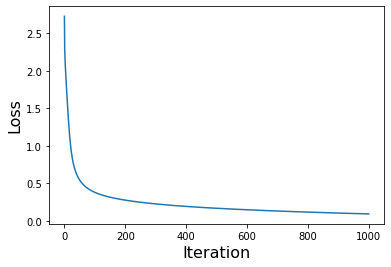

In [74]:
import matplotlib.pyplot as plt
plt.plot(iteration_X, cost_y)
plt.xlabel('Iteration', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.savefig('learning.jpg', dpi=300)

## prediction and accuracy

In [49]:
W2 = trained_parameters['W2']
W1 = trained_parameters['W2']
b2 = trained_parameters['b2']
b1 = trained_parameters['b1']

In [51]:
#run forward propogation with trained parameters on X_test
_, probs = NN.forward_prop(X_test, trained_parameters)
y_pred = np.argsort(probs, axis=1)[:, -1]

In [55]:
accuracy = np.sum((y_pred == y_test)) / y_pred.shape[0]
print(f"The accuracy of our model is {accuracy*100}%")

The accuracy of our model is 92.0%
